# Basic pipe net

We start with the basic pipe net again:

hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00392156862745098, 0.45098039215686275, 0.6980392156862745) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (31) to draw! The colors will be repeated to fit.
hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.


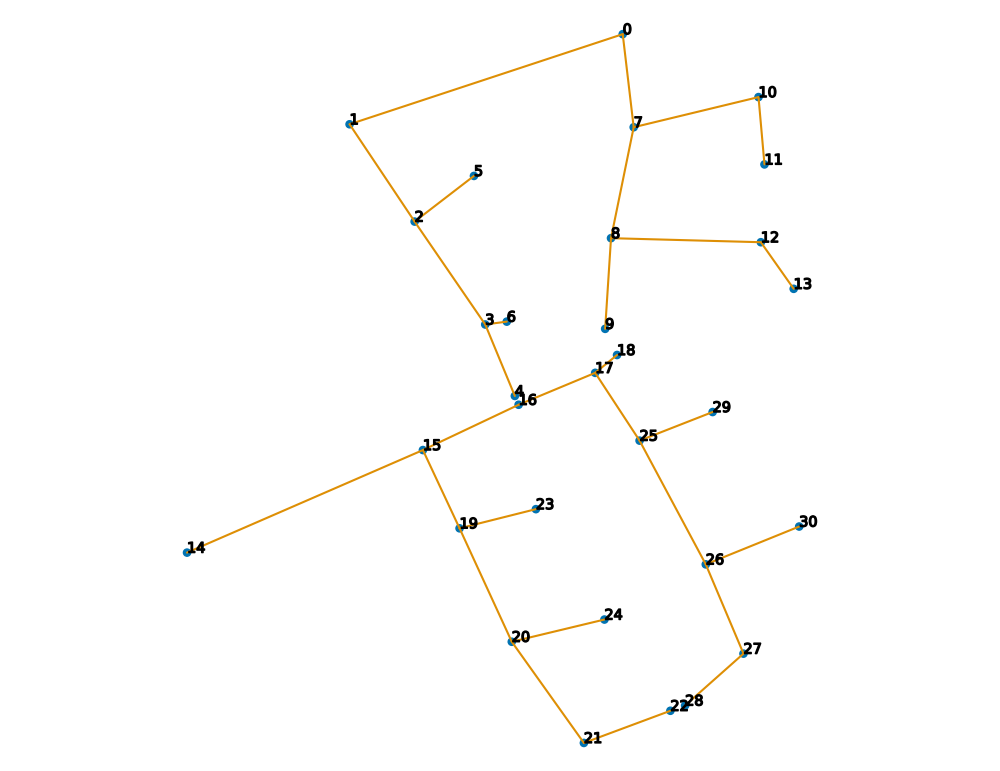

In [103]:
from os.path import join
import pandas as pd
import numpy as np
import pandapipes as pps

import seaborn as sb
import pandapipes.plotting as plot
import matplotlib.pyplot as plt

from pandapower.plotting import create_annotation_collection

input_dir = r'../net_data_pipe/'
in_junctions = pd.read_csv(join(input_dir, 'example_net-junctions.CSV'))
in_pipes = pd.read_csv(join(input_dir, 'example_net-pipes.CSV'))

fluid = 'hgas' # 'lgas', 'hydrogen', 'water'

net = pps.create_empty_network(fluid=fluid)

geodata = in_junctions[['lon', 'lat']].values

pps.create_junctions(net, nr_junctions=31, pn_bar=1, tfluid_k=283.15, height_m=in_junctions['height'], geodata=geodata)
pps.create_pipes_from_parameters(net, in_pipes['from_junction'], in_pipes['to_junction'], length_km=in_pipes['length_km'],
                                 diameter_m = 0.05, k_mm = 0.2)

colors = sb.color_palette('colorblind')

jc = plot.create_junction_collection(net, color=colors[0])
pc = plot.create_pipe_collection(net, color=colors[1])
coords = net.junction_geodata[['x','y']].values
jic = create_annotation_collection(size=20, texts = np.char.mod('%.0f', net.junction.index), 
                                    coords=coords, zorder=150, color='k')

collections = [jc, pc, jic]

plot.draw_collections(collections)
plt.show()


# Heat net

In [104]:
input_dir = r'../net_data_pipe'
in_ijs = pd.read_csv(join(input_dir, 'example_net-intermediate_junctions.CSV'))

In [105]:
pps.create_fluid_from_lib(net, 'water')

In [106]:
pps.create_circ_pump_const_pressure(net, 4,9, 7, 3, t_flow_k=335)
pps.create_circ_pump_const_mass_flow(net, 22, 28, 10, 1, t_flow_k=330)

0

In [107]:
js = pps.create_junctions(net, 6, 1, 283.15, geodata=in_ijs[['lon', 'lat']].values)

In [108]:
pps.create_flow_controls(net, [5, 11, 14, 18, 23, 30], js, 0.5, 0.05)
pps.create_heat_exchangers(net, js, [6, 13, 19, 29, 24, 27], 0.1, 2000)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [109]:
pps.pipeflow(net, mode='all')

In [110]:
net.res_circ_pump_mass

,mdot_flow_kg_per_s,deltap_bar
0,1.0,0.447604


In [114]:
net.res_flow_control

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,0.254729,4.492202,4.444658,334.833952,334.833952,0.5,-0.5,0.000509,9786.923078,0.024492
1,0.254729,6.119408,7.012049,334.833952,334.833952,0.5,-0.5,0.000509,9786.923078,0.024492
2,0.254729,9.611891,9.645880,329.046560,329.046560,0.5,-0.5,0.000508,9786.923078,0.024492
3,0.254729,9.734831,9.839934,329.046560,329.046560,0.5,-0.5,0.000508,9786.923078,0.024492
4,0.254729,9.634550,9.645880,328.569840,328.569840,0.5,-0.5,0.000507,9786.923078,0.024492
5,0.254729,9.858352,9.958923,329.523280,329.523280,0.5,-0.5,0.000508,9786.923078,0.024492


In [116]:
net.res_heat_exchanger

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,0.063682,4.444658,4.268351,334.833952,333.880511,0.5,-0.5,0.000509,4893.461539,0.034321
1,0.063682,7.012049,6.522305,334.833952,333.880511,0.5,-0.5,0.000509,4893.461539,0.034321
2,0.063682,9.645880,9.645880,329.046560,328.569840,0.5,-0.5,0.000507,4893.461539,0.034321
3,0.063682,9.839934,9.839934,329.046560,328.093119,0.5,-0.5,0.000507,4893.461539,0.034321
4,0.063682,9.645880,9.645880,328.569840,327.616399,0.5,-0.5,0.000507,4893.461539,0.034321
5,0.063682,9.958923,9.958923,329.523280,329.523280,0.5,-0.5,0.000508,4893.461539,0.034321


In [117]:
net.res_junction.p_bar.min()

4.0

In [119]:
net.res_pipe.v_mean_m_per_s.abs().min()

0.25472891274128423

In [120]:
net.res_pipe.v_mean_m_per_s.abs().max()

1.7173676576207477